<a href="https://colab.research.google.com/github/ekomissarov/data-analysis/blob/main/6_normal_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

from math import exp, sqrt


In [ ]:
# generate random sample with normal distribution
norm_rv = stats.norm(loc=0, scale=1)
sample_x = norm_rv.rvs(300, random_state=101)
display(sample_x[0:10])

array([ 2.70684984,  0.62813271,  0.90796945,  0.50382575,  0.65111795,
       -0.31931804, -0.84807698,  0.60596535, -2.01816824,  0.74012206])

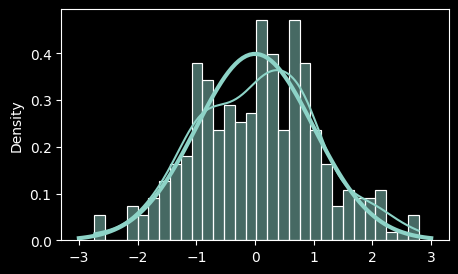

In [ ]:
# plot sample histogram density, kernel density estimation and theoretical normal distribution
x = np.linspace(-3, 3, 100)
pdf = norm_rv.pdf(x)

fig, ax =  plt.subplots(figsize=(5,3))
sns.histplot(sample_x, bins=30, stat="density", kde=True, ax=ax)
ax.plot(x, pdf, lw=3)

plt.show()

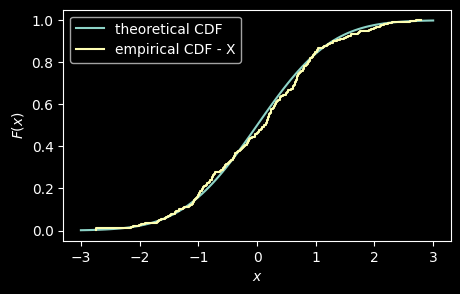

In [ ]:
#empirical cumulative distribution function example
from statsmodels.distributions.empirical_distribution import ECDF

x = np.linspace(-3, 3, 100)

fig, ax =  plt.subplots(figsize=(5,3))
# theoretical cdf
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# empirical сdf
ecdf = ECDF(sample_x)
plt.step(ecdf.x, ecdf.y, label='empirical CDF - X')


plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

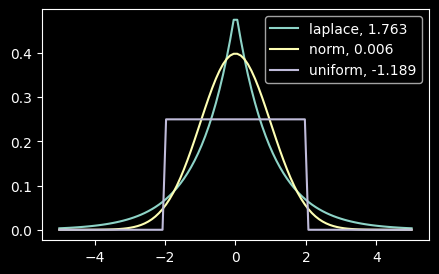

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosistest.html

# The Laplace distribution has a heavier tail than the normal distribution.
# The uniform distribution (which has negative kurtosis) has the thinnest tail.
x = np.linspace(-5, 5, 100)
fig, ax =  plt.subplots(figsize=(5,3))
distnames = ['laplace', 'norm', 'uniform']
for distname in distnames:
    if distname == 'uniform':
        dist = getattr(stats, distname)(loc=-2, scale=4)
    else:
        dist = getattr(stats, distname)
    data = dist.rvs(size=1000)
    kur = stats.kurtosis(data, fisher=True)
    y = dist.pdf(x)
    ax.plot(x, y, label="{}, {}".format(distname, round(kur, 3)))
    ax.legend()

KurtosistestResult(statistic=1.390506156513392, pvalue=0.1643752311205775), kurtosis = 0.7970325152100886

Failed to reject the null hypothesis (in two-sided-type test) - result: distribution is normal


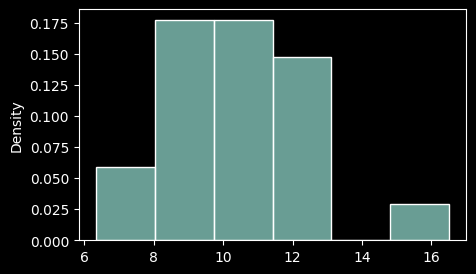

In [ ]:
alpha, alternative = 0.05, 'two-sided'

sample_dist = stats.norm(10,2)
#sample_dist = stats.uniform(-1, 1)

sample_x = sample_dist.rvs(20, random_state=1230)
#sample_x = np.array([148, 154, 158, 160, 161, 162, 166, 170, 182, 195, 236])

res = stats.kurtosistest(sample_x, alternative=alternative)
print(f"{res}, kurtosis = {stats.kurtosis(sample_x, fisher=True)}\n")
if res.pvalue < alpha:
    if alternative == 'less':
        print("negative kurtosis - distriburion has a thinnest tail than the normal distribution")
    elif alternative == 'greater':
        print("positive kurtosis - distribution has a heavier tail than the normal distribution")
    print(f"Rejecting the null hypothesis (in {alternative}-type test) - result: distribution is not normal")
else:
    print(f"Failed to reject the null hypothesis (in {alternative}-type test) - result: distribution is normal")

fig, ax =  plt.subplots(figsize=(5,3))
sns.histplot(sample_x, stat="density")
plt.show()



0.0
-0.5663906584758671


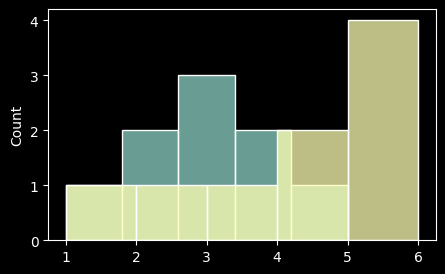

In [ ]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html

fig, ax =  plt.subplots(figsize=(5,3))

sample_x = [1, 2, 3, 4, 5, 2, 3, 4, 3, ]
print(stats.skew(sample_x))
sns.histplot(sample_x)

sample_y = [1, 2, 3, 4, 4, 5, 5, 5, 6, ]
print(stats.skew(sample_y))
sns.histplot(sample_y)

plt.show()

SkewtestResult(statistic=-1.2948740837504593, pvalue=0.19536367009074496), skew = -0.7380545648862156

Rejecting the null hypothesis (in two-sided-type test) - result: skewness is not like in normal distribution


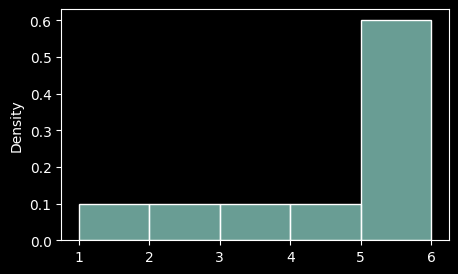

In [ ]:
alpha, alternative = 0.2, 'two-sided'

sample_dist = stats.norm(10,2)

sample_x = sample_dist.rvs(20, random_state=1230)
#sample_x = np.array([148, 154, 158, 160, 161, 162, 166, 170, 182, 195, 236])
#sample_x = np.array([1, 2, 3, 4, 5, 2, 3, 4, 3, 3, ])
sample_x = np.array([1, 2, 3, 4, 5, 5, 6, 6, 6, 6, ])
#sample_x = np.array([1, 1, 1, 1, 2, 2, 3, 4, 5, 6, ])

res = stats.skewtest(sample_x, alternative=alternative)
print(f"{res}, skew = {stats.skew(sample_x)}\n")
if res.pvalue < alpha:
    if alternative == 'less':
        print("negative skew - ,.' type")
    elif alternative == 'greater':
        print("positive skew - '., type")
    print(f"Rejecting the null hypothesis (in {alternative}-type test) - result: skewness is not like in normal distribution")
else:
    print(f"Failed to reject the null hypothesis (in {alternative}-type test) - result: the skewness of the population that the sample was drawn from\n is the same as that of a corresponding normal distribution")

fig, ax =  plt.subplots(figsize=(5,3))
sns.histplot(sample_x, stat="density")
plt.show()
